In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preprocessing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression  # for logistic regression
from sklearn.neighbors import KNeighborsClassifier  # for k-nearest neighbors
from sklearn.svm import SVC  # for support vector classifier
from sklearn.tree import DecisionTreeClassifier  # for decision tree classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # ensemble methods
from xgboost import XGBClassifier  # XGBoost classifier

# Metrics libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset 'creditcard.csv' into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

In [3]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Print the first few rows of the DataFrame
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Explore the datatype of each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(284807, 31)

In [6]:
# Retrieve the column names of the DataFrame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Import the Normalizer class from sklearn.preprocessing
from sklearn.preprocessing import Normalizer

# Create an instance of the Normalizer class with L2 normalization
normalizer = Normalizer(norm='l2')

# Fit the normalizer to the data and transform it
normalized_data = normalizer.fit_transform(df)

# Print the normalized data
print(normalized_data)

[[ 0.00000000e+00 -9.08530061e-03 -4.86273988e-04 ... -1.40662094e-04
   9.99658439e-01  0.00000000e+00]
 [ 0.00000000e+00  3.14200001e-01  7.01632379e-02 ...  3.88161797e-03
   7.09143734e-01  0.00000000e+00]
 [ 2.64054194e-03 -3.58679087e-03 -3.53875680e-03 ... -1.57777241e-04
   9.99867610e-01  0.00000000e+00]
 ...
 [ 9.99999922e-01  1.11093644e-05 -1.74348810e-06 ... -1.53719162e-07
   3.92851325e-04  0.00000000e+00]
 [ 9.99999998e-01 -1.39153210e-06  3.07013515e-06 ...  6.04977321e-07
   5.78743893e-05  0.00000000e+00]
 [ 9.99999211e-01 -3.08701850e-06 -1.09804382e-06 ...  7.89903674e-08
   1.25584419e-03  0.00000000e+00]]


In [8]:
# Display the distribution of legitimate (Class 0) and fraudulent (Class 1) transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Separate the data into two subsets: legitimate transactions and fraudulent transactions
legit = df[df['Class'] == 0]  # Subset containing legitimate transactions (Class 0)
fraud = df[df['Class'] == 1]  # Subset containing fraudulent transactions (Class 1)

In [10]:
# Display statistical measures of the legitimate transactions data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [11]:
# Display statistical measures of the 'Amount' column for legitimate transactions
legit['Amount'].describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# Display statistical measures of the fraudulent transactions data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [13]:
# Display statistical measures of the 'Amount' column for fraudulent transactions
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Compare the mean values of each column for both legitimate and fraudulent transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
# Under-Sampling: building a sample dataset containing a similar distribution of normal transactions and fraudulent transactions
# Sample 492 random rows from the legitimate transactions DataFrame
legit_sample = legit.sample(n=492)

# Concatenate the sampled legitimate transactions DataFrame with the entire fraudulent transactions DataFrame
new_df = pd.concat([legit_sample, fraud], axis=0)

# Print the first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46123,42646.0,0.980773,-0.760751,1.023758,0.089751,-0.934655,0.868597,-0.931571,0.540344,1.128529,-0.357777,1.135798,0.749445,-1.441545,-0.031149,-0.347781,-0.446877,0.532650,-0.879866,0.023453,-0.109117,-0.109867,-0.202212,0.098617,-0.233036,-0.104161,0.982861,-0.022585,0.003624,60.00,0
77676,57161.0,0.988125,0.135780,0.966310,2.617518,-0.390137,0.454496,-0.276852,0.346896,-0.329579,0.677429,0.959299,0.212315,-1.761692,0.440155,-0.925554,0.196089,-0.048651,-0.506434,-0.728714,-0.229644,-0.194736,-0.603293,0.117160,0.152089,0.181286,-0.178389,0.005743,0.017507,37.88,0
220537,142214.0,-0.232997,-0.754130,-1.037744,-2.401302,-0.217301,-1.473929,1.669966,-0.688082,-2.942952,0.822894,-1.342018,-1.711500,-0.417170,0.341766,-1.077621,-1.406378,0.709237,-0.075816,-0.142076,0.063729,0.356653,1.079107,0.094141,-0.004844,0.323360,0.209101,0.033154,0.169025,228.41,0
185716,126790.0,-7.168626,6.836557,-3.601800,-2.452188,-0.713958,-1.244052,0.727505,0.174939,5.822267,9.990176,1.406761,1.443081,1.097838,-1.933773,0.121356,-0.924643,-1.189201,0.101866,-0.574795,4.434856,-0.526261,0.765468,0.237514,-0.406716,0.962540,-0.077275,3.951343,2.305026,0.89,0
6101,6975.0,1.065532,-0.960645,1.288456,-0.656792,-1.459138,0.248824,-1.093374,0.214815,4.145546,-1.886172,-0.032328,-1.481134,0.851368,0.615002,-1.381595,-1.620819,1.756685,-0.541080,0.872831,-0.122884,-0.292403,-0.118788,-0.063230,0.100186,0.386752,0.021494,0.052740,0.022234,59.00,0


In [16]:
# Get the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)

# If there are no missing values, print a message
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    # Otherwise, print the count of missing values for each column
    print("Missing values found:")
    print(missing_values)

No missing values found.


In [18]:
# Get the shape of the DataFrame new_df (number of rows and columns)
new_df.shape

(984, 31)

In [19]:
# Splitting the data into Features (X) and Targets (y)
X = new_df.drop(columns='Class', axis=1)  # Features (independent variables) excluding the 'Class' column
y = new_df['Class']  # Target variable (dependent variable), 'Class' column


In [20]:
# Splitting the data into Training data and Testing data
# X_train: Features for training
# X_test: Features for testing
# y_train: Target labels for training
# y_test: Target labels for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Check whether the data is split in an 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)


(984, 30) (787, 30) (197, 30)


In [22]:
# Call the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [23]:
# Importing necessary libraries
from sklearn.pipeline import Pipeline

# Create a pipeline for the model
pipeline = Pipeline([
    ('model', model)  # 'model' step with the RandomForestClassifier model
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall)
print('Precision Score: ', precision)
print('F1 Score: ', f1)

# Save the best model
import pickle
pickle.dump(pipeline, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9326211400467628
Test Accuracy: 0.9238578680203046
Recall Score:  0.8775510204081632
Precision Score:  0.9662921348314607
F1 Score:  0.9197860962566845


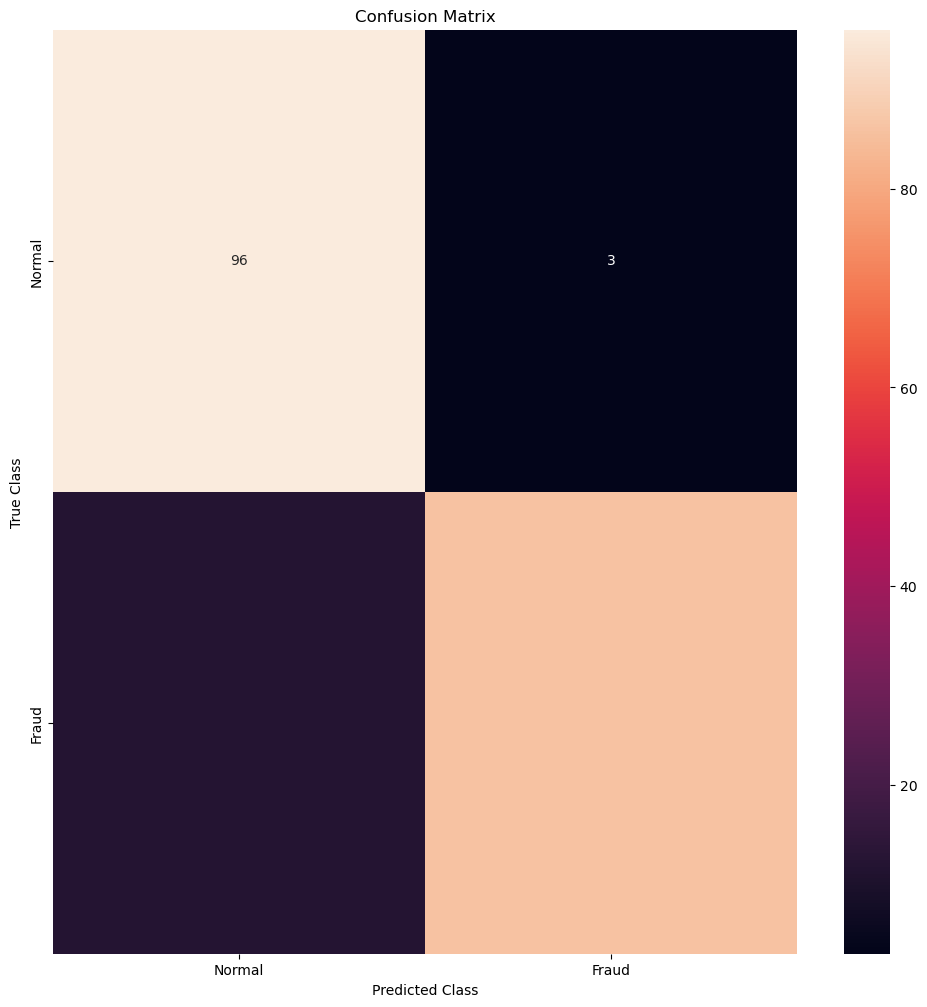

In [24]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix

# Define class labels for the confusion matrix
LABELS = ['Normal', 'Fraud'] 

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 

# Plot confusion matrix
plt.figure(figsize=(12, 12)) 
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix") 
plt.ylabel('True Class') 
plt.xlabel('Predicted Class') 
plt.show()

In [25]:
# Create a copy of the subsample dataset 'new_df' and assign it to 'df_train'
df_train = new_df.copy()

# Display the first few rows of the 'df_train' DataFrame
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46123,42646.0,0.980773,-0.760751,1.023758,0.089751,-0.934655,0.868597,-0.931571,0.540344,1.128529,-0.357777,1.135798,0.749445,-1.441545,-0.031149,-0.347781,-0.446877,0.532650,-0.879866,0.023453,-0.109117,-0.109867,-0.202212,0.098617,-0.233036,-0.104161,0.982861,-0.022585,0.003624,60.00,0
77676,57161.0,0.988125,0.135780,0.966310,2.617518,-0.390137,0.454496,-0.276852,0.346896,-0.329579,0.677429,0.959299,0.212315,-1.761692,0.440155,-0.925554,0.196089,-0.048651,-0.506434,-0.728714,-0.229644,-0.194736,-0.603293,0.117160,0.152089,0.181286,-0.178389,0.005743,0.017507,37.88,0
220537,142214.0,-0.232997,-0.754130,-1.037744,-2.401302,-0.217301,-1.473929,1.669966,-0.688082,-2.942952,0.822894,-1.342018,-1.711500,-0.417170,0.341766,-1.077621,-1.406378,0.709237,-0.075816,-0.142076,0.063729,0.356653,1.079107,0.094141,-0.004844,0.323360,0.209101,0.033154,0.169025,228.41,0
185716,126790.0,-7.168626,6.836557,-3.601800,-2.452188,-0.713958,-1.244052,0.727505,0.174939,5.822267,9.990176,1.406761,1.443081,1.097838,-1.933773,0.121356,-0.924643,-1.189201,0.101866,-0.574795,4.434856,-0.526261,0.765468,0.237514,-0.406716,0.962540,-0.077275,3.951343,2.305026,0.89,0
6101,6975.0,1.065532,-0.960645,1.288456,-0.656792,-1.459138,0.248824,-1.093374,0.214815,4.145546,-1.886172,-0.032328,-1.481134,0.851368,0.615002,-1.381595,-1.620819,1.756685,-0.541080,0.872831,-0.122884,-0.292403,-0.118788,-0.063230,0.100186,0.386752,0.021494,0.052740,0.022234,59.00,0


In [26]:
def display_feature_importance(model, percentage, top_n=34, plot=False):
    # Get features (X) and target variable (y)
    X = df_train.drop('Class', axis=1)
    y = df_train['Class']
    
    # Fit the model using the features and target variable
    model.fit(X, y)
    
    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Calculate the threshold based on a specified percentage of the top feature importance
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']
    
    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
    
    # Print selected features
    print("Selected Features by {} \n \n at threshold {}%; {}".format(type(model).__name__, percentage, selected_features))
    
    if plot:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")
    
        # Plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()
        
    # Add 'Class' to the list of selected features
    selected_features.append('Class')
        
    return selected_features

In [27]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List 
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
    # Get selected features for each model
    xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

    # Append selected features to the respective lists
    selected_features_xgb.append(xgb_selected_features)

    # X and y 
    X = df_train.drop('Class', axis=1)
    y = df_train['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit models on training data
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

    # Predict probabilities on the test set
    xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

    # Calculate AUC scores and append to the list
    from sklearn.metrics import roc_auc_score

    auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
    auc_scores.append((auc_xgb, percentage))

    # Sorted AUC 
    sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage 
for score, percentage in sorted_auc:
    print(f'The AUC for {type(XGBClassifier(random_state=42)).__name__} with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier 
 
 at threshold 3%; ['V14', 'V4', 'V10', 'V23', 'V20', 'V8', 'V7', 'V25', 'V12', 'V1', 'V11', 'V28', 'V17', 'V18', 'V15', 'V16', 'Amount']
Selected Features by XGBClassifier 
 
 at threshold 5%; ['V14', 'V4', 'V10', 'V23', 'V20', 'V8', 'V7', 'V25']
Selected Features by XGBClassifier 
 
 at threshold 10%; ['V14', 'V4']
Selected Features by XGBClassifier 
 
 at threshold 20%; ['V14']
Selected Features by XGBClassifier 
 
 at threshold 40%; ['V14']
The AUC for XGBClassifier with 3% of top features is 0.9791
The AUC for XGBClassifier with 5% of top features is 0.9737
The AUC for XGBClassifier with 10% of top features is 0.9653
The AUC for XGBClassifier with 40% of top features is 0.9589
The AUC for XGBClassifier with 20% of top features is 0.9589


In [28]:
# List of important features extracted using XGBoost
imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17', 'Class']

# Update df_train to include only the important features
df_train = df_train[imp_fea]

# Display the first few rows of the updated DataFrame
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
46123,-0.031149,-0.357777,0.089751,-0.931571,-0.109867,0.540344,-0.109117,1.023758,-0.934655,1.135798,0.749445,0.982861,0.532650,0
77676,0.440155,0.677429,2.617518,-0.276852,-0.194736,0.346896,-0.229644,0.966310,-0.390137,0.959299,0.212315,-0.178389,-0.048651,0
220537,0.341766,0.822894,-2.401302,1.669966,0.356653,-0.688082,0.063729,-1.037744,-0.217301,-1.342018,-1.711500,0.209101,0.709237,0
185716,-1.933773,9.990176,-2.452188,0.727505,-0.526261,0.174939,4.434856,-3.601800,-0.713958,1.406761,1.443081,-0.077275,-1.189201,0
6101,0.615002,-1.886172,-0.656792,-1.093374,-0.292403,0.214815,-0.122884,1.288456,-1.459138,-0.032328,-1.481134,0.021494,1.756685,0


In [29]:
# Check the shape of the DataFrame df_train
df_train.shape

(984, 14)

In [30]:
def train_random_forest(data, target):
    """
    Train a Random Forest model using the provided data.

    Parameters:
        data (DataFrame): The input DataFrame containing features and target.
        target (str): The name of the target column.

    Returns:
        best_rf_model (RandomForestClassifier): The trained Random Forest model with the best hyperparameters.
        best_params (dict): The best hyperparameters selected by GridSearchCV.
        accuracy (float): The accuracy of the best model on the test set.
    """
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')
    
    # Visualize the confusion matrix
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf) 
    plt.figure(figsize=(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

    return best_rf_model, best_params, accuracy


Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on Test Set: 0.93
Precision on Test Set: 0.97
Recall on Test Set: 0.89


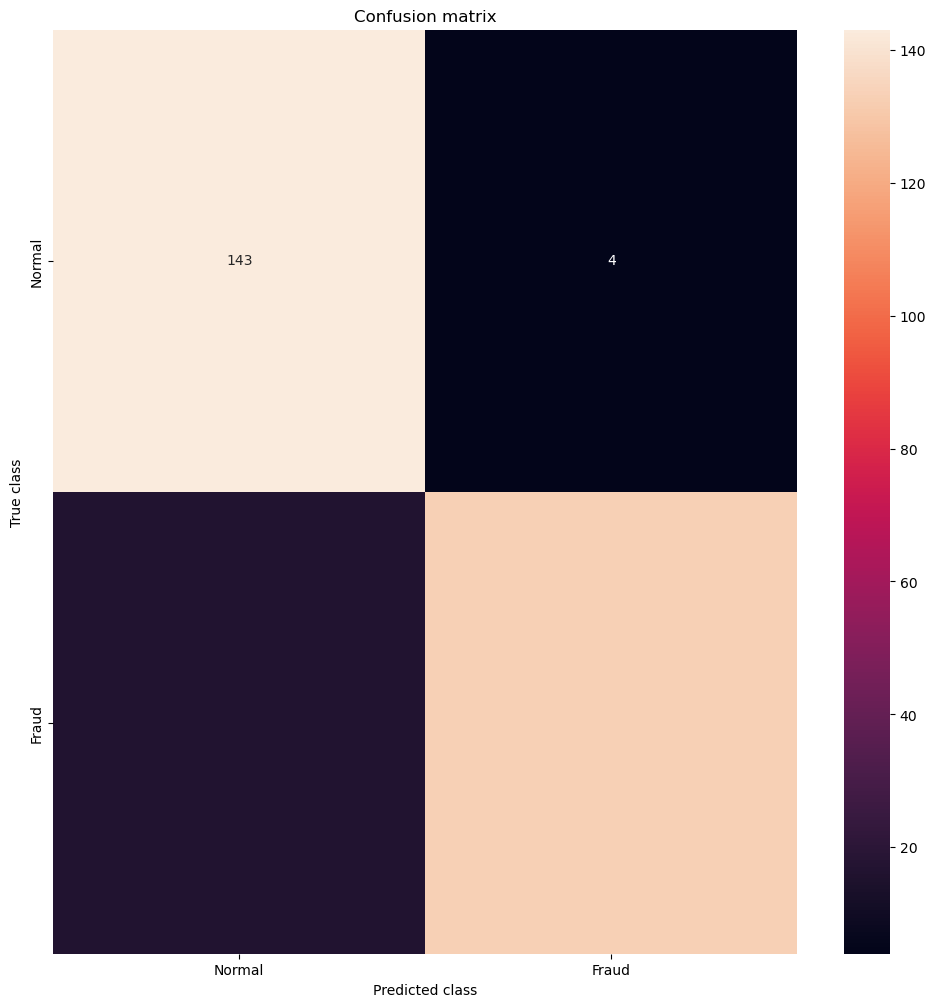

(RandomForestClassifier(class_weight='balanced', max_depth=10,
                        min_samples_leaf=4, min_samples_split=10,
                        n_estimators=50, random_state=0),
 {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 50},
 0.9324324324324325)

In [31]:
train_random_forest(df_train,'Class')

In [32]:
def train_xgb_classifier(data, target):
    """
    Train an XGBoost classifier using the provided data.

    Parameters:
        data (DataFrame): The input DataFrame containing features and target.
        target (str): The name of the target column.

    Returns:
        best_xgb_model (XGBClassifier): The trained XGBoost model with the best hyperparameters.
        best_params (dict): The best hyperparameters selected by GridSearchCV.
    """
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')
    
    # Visualize the confusion matrix
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb) 
    plt.figure(figsize=(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

    return best_xgb_model, best_params


Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy on Test Set: 0.94
Precision on Test Set: 0.98
Recall on Test Set: 0.90


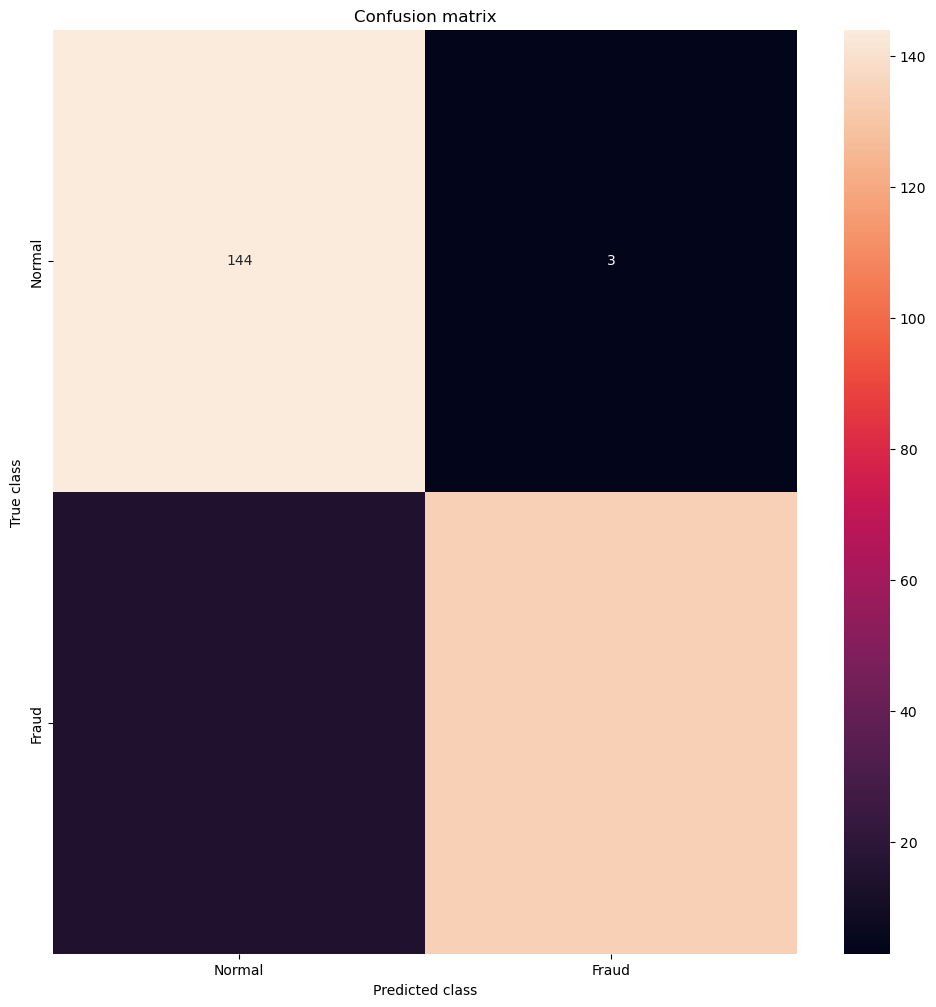

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 100,
  'subsample': 0.8})

In [33]:
train_xgb_classifier(df_train,'Class')

In [34]:
# List of trained models
models = ['XGB Classifier', 'RandomForestClassifier']

# List of accuracy scores for each model
accuracy_scores = [accuracy, accuracy]

# Find the index of the maximum accuracy
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Print the best model with its accuracy
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')


Best Accuracy: 0.92 with Model: XGB Classifier
